# Video: Checking for Outliers and Corrupt Data

This video walks through basic checks for outliers and corrupt data.

In [ ]:
!wget https://storage.googleapis.com/kaggle-forum-message-attachments/184054/6553/Dirty_deputies_v3.zip

--2024-10-28 19:28:12--  https://storage.googleapis.com/kaggle-forum-message-attachments/184054/6553/Dirty_deputies_v3.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.207, 173.194.216.207, 173.194.217.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5425975 (5.2M) [application/octet-stream]
Saving to: ‘Dirty_deputies_v3.zip’

Dirty_deputies_v3.z 100%[===================>]   5.17M  --.-KB/s    in 0.08s   

2024-10-28 19:28:12 (66.2 MB/s) - ‘Dirty_deputies_v3.zip’ saved [5425975/5425975]



In [ ]:
!unzip Dirty_deputies_v3.zip

Archive:  Dirty_deputies_v3.zip
  inflating: Dirty_deputies_v3.csv   


In [ ]:
import pandas as pd

Script:
* In this video, I'll show you the most basic method for identifying outliers and corrupt data in your data set.
* The basic method is simple - just make a histogram - but I'll point out a few nuances along the way.
* To illustrate this process, I downloaded a data set of reimbursements by Brazil's House of Deputies that was made available as part of a transparency and anti-corruption effort.


In [ ]:
deputies = pd.read_csv("Dirty_deputies_v3.csv")

In [ ]:
deputies.head()

,Unnamed: 0.2,Unnamed: 0,Unnamed: 0.1,deputy_name,deputy_state,political_party,company_id,refund_date,refund_value,party_pg,...,party_nmembers,party_ideology1,party_ideology2,party_ideology3,party_ideology4,party_position,refund_description,type,company_name_new,company_name
0,0,0,0,PROFESSOR VICTÓRIO GALLI,MT,PSC,5.423963e+12,2016-03-25T00:00:00,620.80,Partido Social Cristão,...,417221.0,Conservatism,NaN,NaN,NaN,Rightwing,PHONE COSTS,telecomunicacao,14,14_brasil_telecomunicacao_celular
1,1,1,1,PROFESSOR VICTÓRIO GALLI,MT,PSC,5.423963e+12,2016-05-25T00:00:00,653.21,Partido Social Cristão,...,417221.0,Conservatism,NaN,NaN,NaN,Rightwing,PHONE COSTS,telecomunicacao,14,14_brasil_telecomunicacao_celular
2,2,2,2,PROFESSOR VICTÓRIO GALLI,MT,PSC,5.423963e+12,2016-02-25T00:00:00,578.30,Partido Social Cristão,...,417221.0,Conservatism,NaN,NaN,NaN,Rightwing,PHONE COSTS,telecomunicacao,14,14_brasil_telecomunicacao_celular
3,3,3,3,PROFESSOR VICTÓRIO GALLI,MT,PSC,5.423963e+12,2016-04-25T00:00:00,633.13,Partido Social Cristão,...,417221.0,Conservatism,NaN,NaN,NaN,Rightwing,PHONE COSTS,telecomunicacao,14,14_brasil_telecomunicacao_celular
4,4,4,4,ANA PERUGINI,SP,PT,1.913889e+13,2016-07-17T00:00:00,144.99,Partido dos Trabalhadores,...,1589260.0,Democratic socialism,NaN,NaN,NaN,Centreleft,HOTEL COSTS,hotel,2_0,2_0_hotel_birigui


Script:
* For this analysis, we will just look at the refund value.
* Let's start with a basic histogram.

<Axes: >

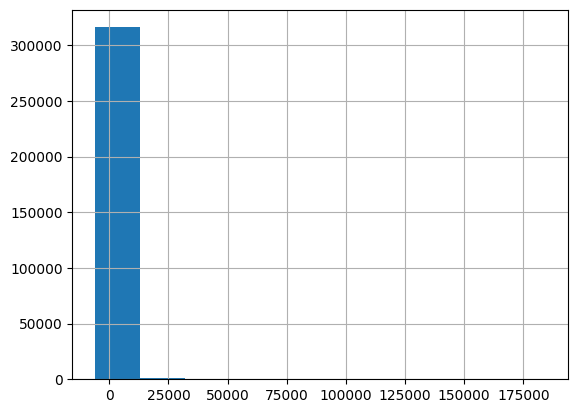

In [ ]:
deputies["refund_value"].hist()

Script:
* From this histogram, we see that most of the reimbursements are pretty concentrated.
* It looks like they are mostly under $15,000 but we will have to make the bars finer to tell for sure.
* It is also clear that there are some much higher reimbursements since the labels on the x-axis go up to $175,000?
* Those should get more scrutiny - they might represent dirty data or dirty politicians?
* Let's take a more fine-grained look at the data with more histogram bins.

<Axes: >

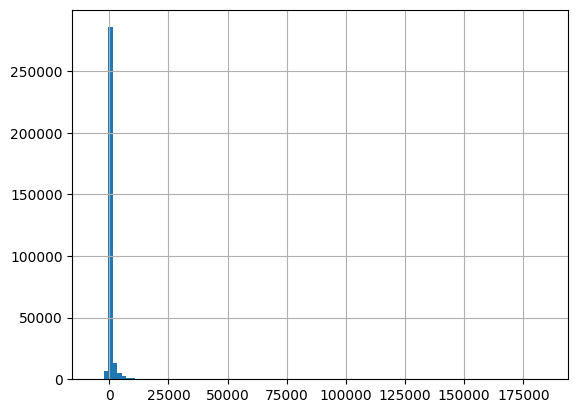

In [ ]:
deputies["refund_value"].hist(bins=100)

Script:
* From this histogram, we can seem more clearly that most of the reimbursements are a few thousand dollars or less, which makes the extremely high values look even more like outliers.
* Also, there is a small bin to the left of the bin containing zero.
* What's that?
* Let's double check the range of these values.

In [ ]:
deputies["refund_value"].agg(["min", "max"])

,refund_value
min,-6100.0
max,184500.0


Script:
* So the highest value is about \$185,000 which is not a surprise.
* But there is at least one reimbursement for negative \$6,000.
* What does a negative reimbursement mean?
* Was something reversed or cancelled out?
* That bears further investigation.
* Let's look a histogram with the values from $0 to $25,000 filtered out, so we can look more at the extreme values.

In [ ]:
deputies.query("refund_value < 0 or refund_value > 25000")["refund_value"].hist(bins=100)

Script:
* It looks like there are quite a few negative reimbursements in this data set.
* Most of them are relatively small, but there are thousands of them.
* We found these rows pretty easily using histograms and the min/max statistics.
* We will need to learn more about where they came from to decide what to do with them which will be the case for most problems.